In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data acquistion step ie load data and create dataframe with name original
original = pd.read_excel("C:\\Users\\pramod\\Desktop\\machine learning training somen choudhary\\project assessment21aug20imp-bank personal loan model\\Bank_Personal_Loan_Modelling_Latest.xlsx")

In [3]:
original

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
feature=original.drop("Personal Loan",axis=1)
target=original["Personal Loan"]

loans = feature.join(target)

In [5]:
loans 

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \
0            0                   1           0       0           0   
1            0                   1           0       0           0   
2            0                   0           0       0           0   
3            0                   0           0       0           0   
4            0                   0           0       0           1   
...        ...                 ...         ...     ...         ...   
4995         0                   0           0       1           0   
4996        85                   0           0       1           0   
4997         0                   0           0       0           0   
4998         0                   0           0       1           0   
4999         0                   0           0       1           1   

      Personal Loan  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4995              0  
4996              0  
4997              0  
4998              0  
4999              0  

[5000 rows x 14 columns]

In [6]:
loans.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0

In [7]:
loans.tail(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \
4995         0                   0           0       1           0   
4996        85                   0           0       1           0   
4997         0                   0           0       0           0   
4998         0                   0           0       1           0   
4999         0                   0           0       1           1   

      Personal Loan  
4995              0  
4996              0  
4997              0  
4998              0  
4999              0

In [8]:
#Exploratory Data Analysis (EDA)
#detailed information is mentioned below

In [9]:
listItem = []
for col in loans.columns :
    listItem.append([col,loans[col].dtype,
                     loans[col].isna().sum(),
                     round((loans[col].isna().sum()/len(loans[col])) * 100,2),
                    loans[col].nunique(),
                     list(loans[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0                   ID    int64     0      0.0    5000   
1                  Age    int64     0      0.0      45   
2           Experience    int64     0      0.0      47   
3               Income    int64     0      0.0     162   
4             ZIP Code    int64     0      0.0     467   
5               Family    int64     0      0.0       4   
6                CCAvg  float64     0      0.0     108   
7            Education    int64     0      0.0       3   
8             Mortgage    int64     0      0.0     347   
9   Securities Account    int64     0      0.0       2   
10          CD Account    int64     0      0.0       2   
11              Online    int64     0      0.0       2   
12          CreditCard    int64     0      0.0       2   
13       Personal Loan    int64     0      0.0       2   

                           uniqueSample  
0         [2988, 1417, 1081, 729, 2756]  
1                  [42, 35, 34, 33, 52]  
2                   [24, 36, 7, 10, 41]  
3                     [63, 18, 25, 111]  
4   [94309, 95020, 90291, 93023, 95616]  
5                             [3, 2, 1]  
6                 [2.9, 0.1, 2.8, 2.67]  
7                             [1, 2, 3]  
8                         [0, 194, 329]  
9                                [1, 0]  
10                               [0, 1]  
11                               [1, 0]  
12                               [0, 1]  
13                               [0, 1]

In [10]:
#data cleaning steps

In [11]:
#Missing value visualization

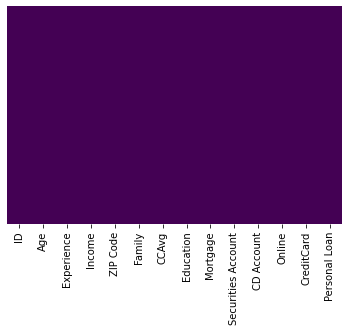

In [12]:
sns.heatmap(loans.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#Irregular value analysis

In [14]:
loans.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0  
Personal Loan           0.0      0.00      1.0

In [15]:
#Irregular value visualization

In [16]:
outvis = loans.copy()  # created a function to make column value as NaN only for columns whose value is less than 0. so we 
#created copy of loan datafram and new name of dataframe is outvis dataframe
def fungsi(x):
    if x<0:
        return np.NaN
    else:
        return x
    
outvis["Experience"] = outvis["Experience"].apply(fungsi)

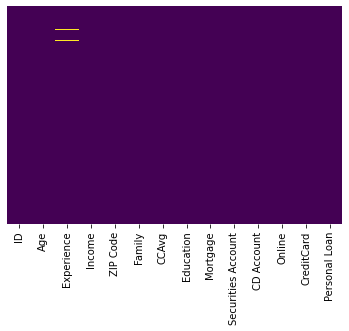

In [17]:
sns.heatmap(outvis.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [18]:
#2nd Irregular value analysis

In [19]:
pd.DataFrame(loans.groupby("Education").mean()["Experience"])

Experience
Education            
1           20.065363
2           19.770492
3           20.471686

In [20]:
pd.DataFrame(loans.groupby("Age").mean()["Experience"]).tail(8)

Experience
Age            
60    34.645669
61    35.672131
62    36.829268
63    37.638889
64    38.846154
65    39.812500
66    40.875000
67    41.833333

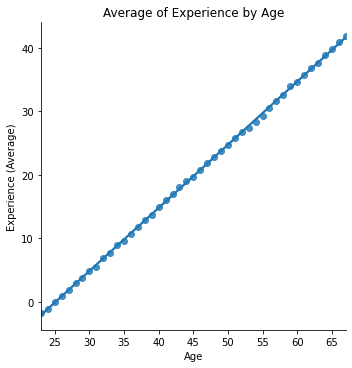

In [21]:
pltdf = pd.DataFrame(loans.groupby("Age").mean()["Experience"]).reset_index()
sns.lmplot(x='Age',y='Experience',data=pltdf)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")
plt.show()

In [22]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age")).head()


Age  Experience
2717   23          -2
3130   23          -2
3425   23          -1
2962   23          -2
909    23          -1

In [23]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Age"].unique()

array([23, 24, 25, 26, 28, 29], dtype=int64)

In [24]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Experience"].unique()

array([-2, -1, -3], dtype=int64)

In [25]:
#Irregular value handling feature 1

In [26]:
loans["Experience"] = loans["Experience"].apply(abs)  # used abs python inbuilt function here.

In [27]:
# def fungsi(x):
#     if x<0:
#         return np.NaN
#     else:
#         return x
    
# loans["Experience"] = loans["Experience"].apply(fungsi)

# loans.dropna(inplace=True)

In [28]:
# def fungsi(x):
#     if x== -1:
#         return 2
#     elif x== -2:
#         return 1
#     elif x== -3:
#         return 0
#     else:
#         return x
    
# loans["Experience"] = loans["Experience"].apply(fungsi)

In [29]:
loans.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0  
Personal Loan           0.0      0.00      1.0

In [30]:
#Data type analysis
#It's important to make sure that each feature already use correct data type. so i need to  make sure that all features already
#use correct data type based on whether the feature is categorical or numerical. Please change:

#categorical feature into 'int64', and
#numerical feature into 'float64'

In [31]:
# loans.info()

In [32]:
#Categorical feature:
#    ordinal:
#-Family
#-Education

#nominal:
#-ID
#-Zip Code
#-Securities Account
#-CD Account
#-Online
#-Credit Card

In [33]:
#Numerical feature:
#    Interval or Ratio:    
#-Age
#-Experience
#-Income
#-CCAvg
#-Mortage

In [34]:
loans[["Age","Experience","Income","CCAvg","Mortgage"]] = loans[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)

In [35]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


In [36]:
#Feature correlation analysis
#i am checking here if there are possibility of multi-correlation between features and in the same time to get insight about
#which features (X) that have good correlation with our target (y)

In [37]:
feature = loans.drop(["ID","Personal Loan"],axis=1)  # feature  is x variable
target = loans["Personal Loan"]    # target is y variable this we need to predict so y is personal loan column in dataset

In [38]:
#1. Heatmap correlation
#Heatmap is one of simplest method to analyze feature correlation.

#Heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
#Heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our
#target

In [39]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(feature.corr(),annot=True,square=True)

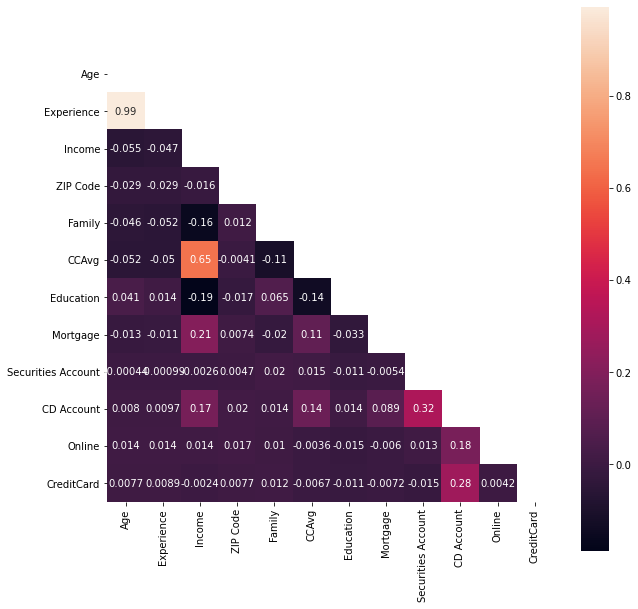

In [40]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

In [41]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(feature.join(target).corr(),annot=True,square=True)

In [42]:
# plt.figure(figsize=(20, 20))
# sns.pairplot(feature.join(target).drop(["ZIP Code"],axis=1),hue="Personal Loan")

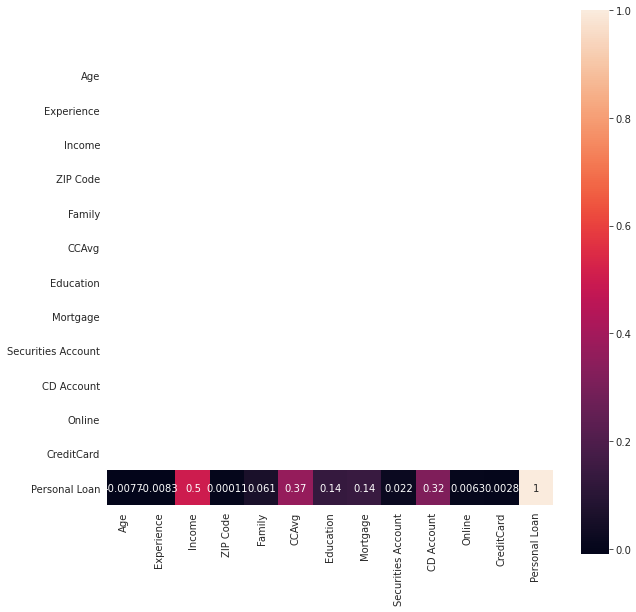

In [43]:
loans_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(loans_corr, annot=True,square=True,mask=mask)

In [44]:
#Distribution analysis

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

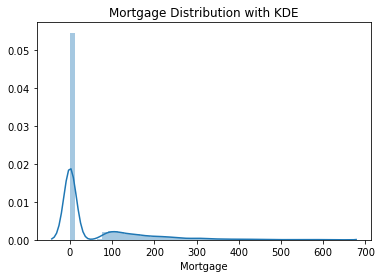

In [45]:
sns.distplot(feature["Mortgage"])
plt.title("Mortgage Distribution with KDE")

In [46]:
#Irregular value handling feature 2 (extreme positive skewed data)¶

Text(0.5, 1.0, 'Mortgage Distribution with KDE First Transformation')

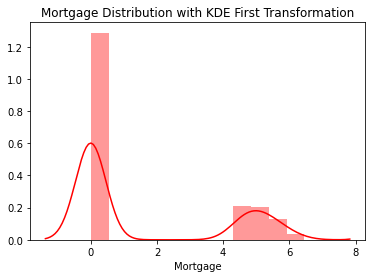

In [47]:
#https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p

SingleLog_y = np.log1p(feature["Mortgage"])     # Log transformation of the target variable
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution with KDE First Transformation")

Text(0.5, 1.0, 'Mortgage Distribution with KDE Second Transformation')

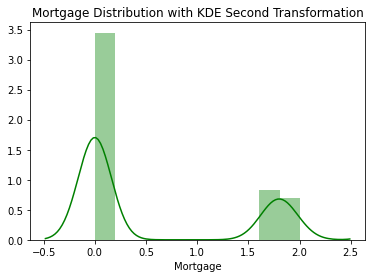

In [48]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution with KDE Second Transformation")

In [49]:
loans["Mortgage"] = DoubleLog_y

In [50]:
#Distribution analysis 2

In [51]:
source_counts =pd.DataFrame(loans["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

Labels  Personal Loan
0       0           4520
1       1            480

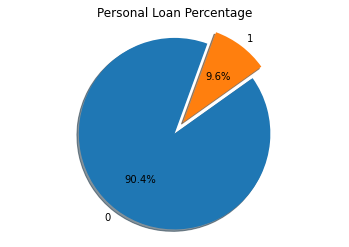

In [52]:
#https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

Text(0.5, 1.0, 'Income Distribution')

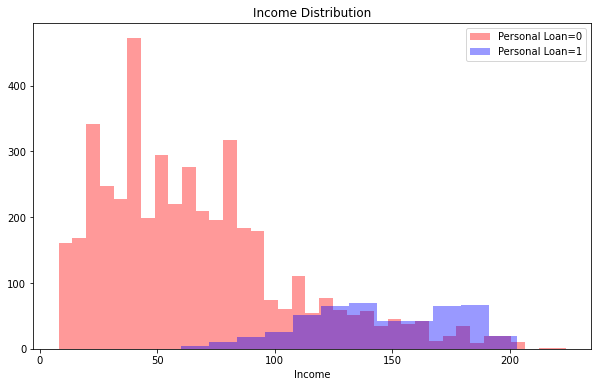

In [53]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

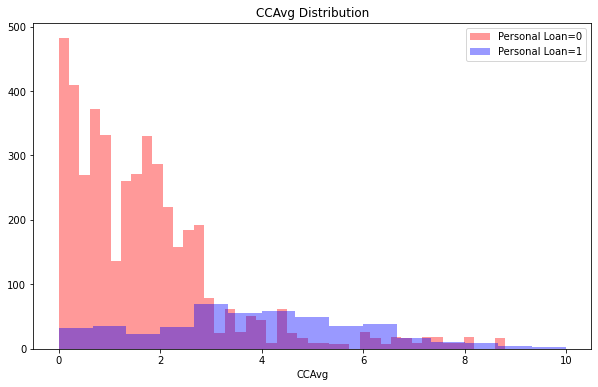

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Experience Distribution')

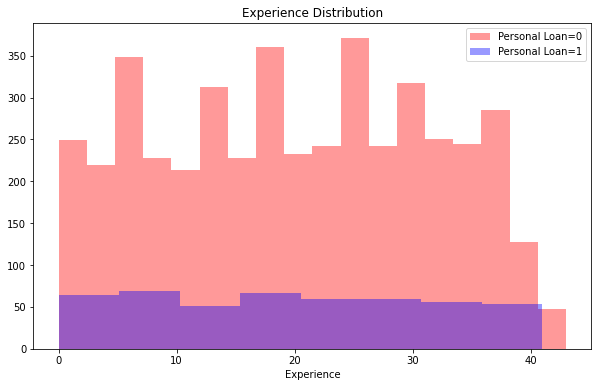

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5, 1.0, 'Securities Account Countplot')

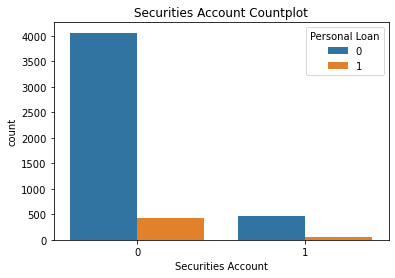

In [56]:
sns.countplot(x='Securities Account',data=loans,hue='Personal Loan')
plt.title("Securities Account Countplot")

Text(0.5, 1.0, 'Family Countplot')

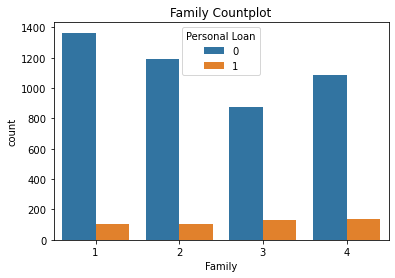

In [57]:
sns.countplot(x='Family',data=loans,hue='Personal Loan')
plt.title("Family Countplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

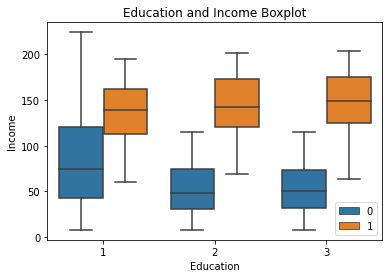

In [58]:
sns.boxplot(x='Education',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Family and Income Boxplot')

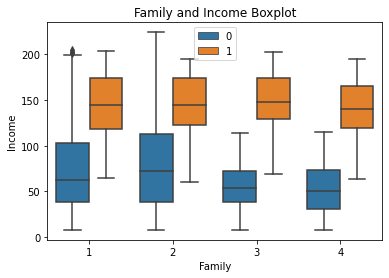

In [59]:
sns.boxplot(x='Family',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

In [60]:
#Feature Selection
#Based on "Feature correlation analysis" & "Distribution analysis" we can throw away some unnecessary
#features or even if we want to addnew feature. we should take only neccessary features.

In [61]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]   # target is personal loan taken by customer or not so it is y variable to be predicted. 
#so in dataset y column/target column name will be Personal loan


In [62]:
#Features Removing

In [63]:
feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

In [64]:
#feature addition

In [65]:
# feature["Combination"] = (feature["Income"]/12)-feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)/feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)*feature["CCAvg"]
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]

In [66]:
# feature scaling
#https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler#:~:text=The%20idea%20behind%20StandardScaler%20is,each%20column%20of%20the%20data).

#The idea behind StandardScaler is that it will transform your data such that its distribution will 
#have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done 
#feature-wise (in other words independently for each column of the data).

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# # NOTE: 1.  feature scalaing or normilization is requierd where in algo eucidian distance is calculated so feature 
#scalaring  is required in KNN and k mean clustering and hierarchial clustering and also in linear regression gradient descent
#we need to perform feature scalaing  to quickly reach to global minima point.
# in case of deep learning in ANN and CNN and RNN and LSTM we need to perform feature scalaing or normalization
#also  
# 2.feature scalaing or feature normilization is not required for these algo eg decision tree , ensemble techniquies like 
#random forest, gradient boosting and  xgboost , adaboost. 


In [67]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#:~:text=The%20data%20used%20to%20compute,scaling%20along%20the%20features%20axis.&text=fit_params)%5Bsource%5D-,Fit%20to%20data%2C%20then%20transform%20it.,a%20transformed%20version%20of%20X.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();

colscal=["Experience","Mortgage","Income","CCAvg","Combination"]  # for these columns scalaing will be done.

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)

In [68]:
feature

Experience  Mortgage    Income     CCAvg  Combination  Family  \
0      -1.676408 -0.665621 -0.538229 -0.193385    -0.028303       4   
1      -0.099404 -0.665621 -0.864109 -0.250611    -0.028303       3   
2      -0.449849 -0.665621 -1.363793 -0.536736    -0.028303       1   
3      -0.975517 -0.665621  0.569765  0.436091    -0.028303       1   
4      -1.063129 -0.665621 -0.625130 -0.536736    -0.028303       4   
...          ...       ...       ...       ...          ...     ...   
4995   -1.501185 -0.665621 -0.733757 -0.021710    -0.028303       1   
4996   -1.413574  1.368951 -1.276892 -0.880087    -0.028303       4   
4997    1.652823 -0.665621 -1.081363 -0.937312    -0.028303       2   
4998    1.740434 -0.665621 -0.538229 -0.822862    -0.028303       3   
4999   -1.413574 -0.665621  0.200434 -0.651186    -0.028303       3   

      Education  Securities Account  CD Account  
0             1                   1           0  
1             1                   1           0  
2             1                   0           0  
3             2                   0           0  
4             2                   0           0  
...         ...                 ...         ...  
4995          3                   0           0  
4996          1                   0           0  
4997          3                   0           0  
4998          2                   0           0  
4999          1                   0           0  

[5000 rows x 9 columns]

In [69]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [70]:
# create machine learning model step. 
#use logistic regression here.

In [71]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [72]:
#X = feature[['Experience','Income',]]
#y = df_new1[['Purchased']]
x = feature
y = target

In [73]:
x

Experience  Mortgage    Income     CCAvg  Combination  Family  \
0      -1.676408 -0.665621 -0.538229 -0.193385    -0.028303       4   
1      -0.099404 -0.665621 -0.864109 -0.250611    -0.028303       3   
2      -0.449849 -0.665621 -1.363793 -0.536736    -0.028303       1   
3      -0.975517 -0.665621  0.569765  0.436091    -0.028303       1   
4      -1.063129 -0.665621 -0.625130 -0.536736    -0.028303       4   
...          ...       ...       ...       ...          ...     ...   
4995   -1.501185 -0.665621 -0.733757 -0.021710    -0.028303       1   
4996   -1.413574  1.368951 -1.276892 -0.880087    -0.028303       4   
4997    1.652823 -0.665621 -1.081363 -0.937312    -0.028303       2   
4998    1.740434 -0.665621 -0.538229 -0.822862    -0.028303       3   
4999   -1.413574 -0.665621  0.200434 -0.651186    -0.028303       3   

      Education  Securities Account  CD Account  
0             1                   1           0  
1             1                   1           0  
2             1                   0           0  
3             2                   0           0  
4             2                   0           0  
...         ...                 ...         ...  
4995          3                   0           0  
4996          1                   0           0  
4997          3                   0           0  
4998          2                   0           0  
4999          1                   0           0  

[5000 rows x 9 columns]

In [74]:
y  


0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [75]:
x = feature[['Experience','Mortgage','Income' ,'CCAvg','Securities Account','CD Account']]

#y = target[['Purchased']]

In [76]:
x

Experience  Mortgage    Income     CCAvg  Securities Account  CD Account
0      -1.676408 -0.665621 -0.538229 -0.193385                   1           0
1      -0.099404 -0.665621 -0.864109 -0.250611                   1           0
2      -0.449849 -0.665621 -1.363793 -0.536736                   0           0
3      -0.975517 -0.665621  0.569765  0.436091                   0           0
4      -1.063129 -0.665621 -0.625130 -0.536736                   0           0
...          ...       ...       ...       ...                 ...         ...
4995   -1.501185 -0.665621 -0.733757 -0.021710                   0           0
4996   -1.413574  1.368951 -1.276892 -0.880087                   0           0
4997    1.652823 -0.665621 -1.081363 -0.937312                   0           0
4998    1.740434 -0.665621 -0.538229 -0.822862                   0           0
4999   -1.413574 -0.665621  0.200434 -0.651186                   0           0

[5000 rows x 6 columns]

In [77]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [78]:
# split the data for training and testing with ratio of 70 and 30 percent
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)



In [79]:
y_train.value_counts()

0    3166
1     334
Name: Personal Loan, dtype: int64

In [80]:
# create logistic regression model

In [81]:
#Build the logistic regression model
#lr = LogisticRegression()
#lr.fit(x_train, y_train)
#lr.score(x_test,y_test) 
logisticRegr = LogisticRegression()
logisticRegr

LogisticRegression()

In [82]:
logisticRegr.fit(X_train, y_train)  # model fit step note: if do not work then put capital X

LogisticRegression()

In [83]:
#logisticRegr.fit(X,y)
#here we are using score method to check model accuracy.
score_logisticreg = logisticRegr.score(X_train, y_train)
print(score_logisticreg)

0.9471428571428572


In [84]:
y_predicted = logisticRegr.predict(X_test)

In [85]:
# note: right create confustion matrix first and then create the code for checking classification_report to see recall/precsion
#values.

#create the # Evaluate mode performance. below code will print the values of precision and recall and f1-score
#y_predicted = logisticRegr.predict(X_test)
#print(classification_report(y_test, y_predicted))

In [86]:
#Predict for train set  ( Confusion matrix)
pred_train = logisticRegr.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[3114   52]
 [ 133  201]]


In [87]:
#Predict for test set ( Confusion matrix)
pred_test = logisticRegr.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1341   13]
 [  66   80]]


In [88]:
# Evaluate mode performance. below code will print the values of precision and recall and f1-score. this is better way
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.86      0.55      0.67       146

    accuracy                           0.95      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [89]:
# note: this is another way to print values of precision and recall. 

#print('Accuracy on train set: {:.2f}'.format(model.score(X_train, y_train)))  
print('Accuracy on train set: {:.2f}'.format(logisticRegr.score(X_train, y_train)))

Accuracy on train set: 0.95


In [90]:
print('Accuracy on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))


Accuracy on test set: 0.95


In [91]:
print('Recall score: {:.2f}'.format(recall_score(y_test,y_predicted)))


Recall score: 0.55


In [92]:
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_predicted)))


ROC AUC score: 0.77


In [93]:
print('Precision score: {:.2f}'.format(precision_score(y_test,y_predicted)))

Precision score: 0.86


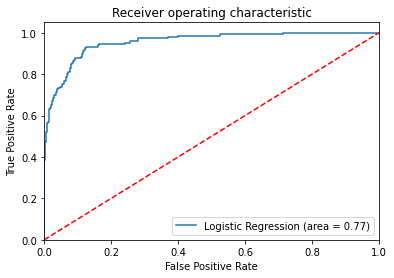

In [94]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [95]:

#model = LogisticRegression(solver = 'liblinear')
#model.fit(X_train, y_train)

#y_predicted = model.predict(X_test)

# Evaluate mode performance 
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_predicted))


In [96]:
from sklearn.linear_model import Ridge

In [97]:
ridge= Ridge(fit_intercept=True)


In [98]:
#ridge.fit(X_train_std,Y_train)
# ridge.fit(X_train_std,Y_train)  not working so change code to below:
#ridge.fit(feature_train,target_train)   
ridge.fit(X_train,y_train)  


Ridge()

In [99]:
Y_pred=ridge.predict(X_train)

In [100]:
w_l1 = ridge.coef_
b_l1 = ridge.intercept_
print(w_l1)
print (b_l1)

[ 0.00512439  0.0080871   0.13948789  0.01737706  0.0101388   0.03448702
  0.07694528 -0.05949178  0.31191514]
-0.14520712494383414


In [101]:
#  Lasso Regression(L1):

In [102]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.preprocessing import StandardScaler



In [103]:
#scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [104]:
sc_X

StandardScaler()

In [105]:
X_train_std = sc_X.fit_transform(X_train)
X_test_std = sc_X.transform(X_test)

In [106]:
lasso = Lasso(fit_intercept = True)
lasso.fit(X_train_std, y_train)
Y_pred = lasso.predict(X_train_std)


In [107]:
Y_test_pred = lasso.predict(X_test_std)

In [108]:
w_l2 = lasso.coef_
b_l2 = lasso.intercept_
print(w_l2)
print (b_l2)

[-0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.09542857142857143


In [109]:
# KNN algorithm

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#metrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [111]:
# split the data for training and testing with ratio of 70 and 30 percent
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# knn = KNeighborsClassifier(n_neighbors = 5)
# knn.fit(x, y)
# knn.score(x, y)
# pred = knn.predict(x)
#mytable = mypd.crosstab(y, pred)
#mytable


In [114]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

knn.score(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
#y_pred = knn.predict(X_train,y_train)

In [115]:
knn.score(X_train, y_train)

0.9765714285714285

In [116]:
# i change above line code to below:
score_knn = knn.score(X_train, y_train)

In [117]:
score_knn

0.9765714285714285

In [118]:
#Predict for train set  ( Confusion matrix)
pred_train = knn.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[3165    1]
 [  81  253]]


In [119]:
#Predict for test set ( Confusion matrix)
pred_test = knn.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1353    1]
 [  53   93]]


In [120]:
# Evaluate mode performance. below code will print the values of precision and recall and f1-score
y_predicted = knn.predict(X_test)


In [121]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.99      0.64      0.78       146

    accuracy                           0.96      1500
   macro avg       0.98      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [122]:
#Naive bayes

In [123]:
#experience column has negative values. when there is negative values in column then we handle it by any one way out of 2 below:
# use absolute function or
#find the no of negative values in a column if the percent is less than 10% then we can drop those negatives values in a column.

#first check how many negative values are there in experience columns
#missing_value=data[data['Experience]'<0]['ID'].count()
#Total = data['ID'].count()
#percent =(missing_value/Total)*100
#print (%d perrcent of value is missing in experience column' %(percent))
   
  
# missing_value=x[x['Experience]'<0]['Mortgage'].count()
#Total = x['Mortgage'].count()
#percent =(missing_value/Total)*100
#print (%d percent of value is missing in experience column' %(percent))    

# ++++++++++++++++++++++++below is accurate formula to find missing values in a column
#note x is dataframe
# x[x['CCAvg']<0]['CCAvg'].count()


In [124]:
# so we will drop missing value from the column Experience
#data.loc[{data['Experience']<0), 'Experience'] = np.nan
#data.dropna(axis=0,inplace=True)
          
# so we will drop missing value from the column Experience

x.loc[x['Experience']<0, 'Experience'] = np.nan   # this is called masking in column experience
x.dropna(axis=0,inplace=True)    # this will drop all the nan values in columns of x dataframe

In [125]:
#x["Experience"] = x["Experience"].apply(abs)  # used abs python inbuilt function here.

In [126]:
x

Experience  Mortgage    Income     CCAvg  Securities Account  CD Account
6       0.601487 -0.665621 -0.038545 -0.250611                   0           0
7       0.338653 -0.665621 -1.124814 -0.937312                   0           0
10      1.652823 -0.665621  0.678392  0.264416                   0           0
12      0.251042 -0.665621  0.873921  1.065567                   1           0
13      1.039544 -0.665621 -0.733757  0.321641                   0           0
...          ...       ...       ...       ...                 ...         ...
4991    0.426264  1.403792  0.395962 -0.021710                   0           0
4993    0.075819 -0.665621  3.133360  2.707928                   0           0
4994    1.740434 -0.665621  0.026631  0.035515                   0           0
4997    1.652823 -0.665621 -1.081363 -0.937312                   0           0
4998    1.740434 -0.665621 -0.538229 -0.822862                   0           0

[2458 rows x 6 columns]

In [127]:
# so we will drop missing value from the column Income
x.loc[x['Income']<0, 'Income'] = np.nan   # this is called masking.
x.dropna(axis=0,inplace=True)  # this will drop all the nan values in columns of x dataframe

In [128]:
x

Experience  Mortgage    Income     CCAvg  Securities Account  CD Account
10      1.652823 -0.665621  0.678392  0.264416                   0           0
12      0.251042 -0.665621  0.873921  1.065567                   1           0
14      1.828046 -0.665621  0.830470  0.035515                   1           0
18      0.075819 -0.665621  2.590225  3.526248                   0           0
35      0.338653 -0.665621  0.156983 -0.708412                   0           0
...          ...       ...       ...       ...                 ...         ...
4964    0.601487 -0.665621  0.787019  1.695044                   0           0
4979    0.513876  1.554314  0.395962  0.378866                   0           0
4991    0.426264  1.403792  0.395962 -0.021710                   0           0
4993    0.075819 -0.665621  3.133360  2.707928                   0           0
4994    1.740434 -0.665621  0.026631  0.035515                   0           0

[991 rows x 6 columns]

In [129]:
x[x['Mortgage']<0]['Mortgage'].count()  #formula to check how many negative values in columns need verification

713

In [130]:
x[x['CCAvg']<0]['CCAvg'].count()

391

In [131]:
# so we will drop missing value from the column Mortgage
x.loc[x['Mortgage']<0, 'Mortgage'] = np.nan   # this is called masking.
x.dropna(axis=0,inplace=True)  # this will drop all the nan values in columns of x dataframe

In [132]:
x

Experience  Mortgage    Income     CCAvg  Securities Account  CD Account
53      0.513876  1.576494  2.525049  0.092740                   0           0
61      0.075819  1.427535  1.112900  2.152845                   1           0
66      1.389989  1.636954  0.678392  0.493316                   0           0
113     1.214766  1.410028  0.395962  0.493316                   0           0
147     0.426264  1.530679  0.200434  0.951117                   0           0
...          ...       ...       ...       ...                 ...         ...
4904    1.740434  1.578780  0.309061  1.065567                   0           0
4930    1.565212  1.421887  0.787019 -0.078935                   0           0
4942    0.513876  1.621602  0.765294  0.264416                   0           1
4979    0.513876  1.554314  0.395962  0.378866                   0           0
4991    0.426264  1.403792  0.395962 -0.021710                   0           0

[278 rows x 6 columns]

In [133]:
# so we will drop missing value from the column CCAvg
x.loc[x['CCAvg']<0, 'CCAvg'] = np.nan   # this is called masking.
x.dropna(axis=0,inplace=True)  # this will drop all the nan values in columns of x dataframe

In [134]:
x

Experience  Mortgage    Income     CCAvg  Securities Account  CD Account
53      0.513876  1.576494  2.525049  0.092740                   0           0
61      0.075819  1.427535  1.112900  2.152845                   1           0
66      1.389989  1.636954  0.678392  0.493316                   0           0
113     1.214766  1.410028  0.395962  0.493316                   0           0
147     0.426264  1.530679  0.200434  0.951117                   0           0
...          ...       ...       ...       ...                 ...         ...
4765    1.214766  1.593235  0.178709  1.351693                   0           0
4842    0.251042  1.731879  2.177443  1.523368                   0           0
4904    1.740434  1.578780  0.309061  1.065567                   0           0
4942    0.513876  1.621602  0.765294  0.264416                   0           1
4979    0.513876  1.554314  0.395962  0.378866                   0           0

[165 rows x 6 columns]

In [135]:
x[x['CCAvg']<0]['CCAvg'].count()

0

In [136]:
x[x['Mortgage']<0]['Mortgage'].count()

0

In [137]:
x[x['Experience']<0]['Experience'].count()

0

In [138]:
x[x['Income']<0]['Income'].count()

0

In [139]:
#https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
#There are three types of Naive Bayes model under the scikit-learn library:

#a)Gaussian: It is used in classification and it assumes that features follow a normal distribution.
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

#b)Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification
#problem. Here we can consider Bernoulli trials which is one step further and instead of 
#“word occurring in the document”, we have “count how often word occurs in the document”, you can 
#think of it as “number of times outcome number x_i is observed over the n trials”.

#c)Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). 
#One application would be text classification with ‘bag of words’ model where the 1s & 0s are 
#“word occurs in the document” and “word does not occur in the document” respectively.




In [140]:
#Naive bayes
import numpy as np 
import pandas as pd
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
#Naive Bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
# warnings handling
import warnings
warnings.filterwarnings("ignore")
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
# Train test split
from sklearn.model_selection import train_test_split

In [141]:
# split the data for training and testing with ratio of 70 and 30 percent
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

# note: the Capital X and small y mentioned in above code will be used during model fit step below

In [142]:
clf = GaussianNB()

In [143]:
clf.fit(X_train, y_train)


GaussianNB()

In [144]:
# Naive Bayes model - GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9053333333333333


In [145]:
#Predict for train set  ( Confusion matrix)
pred_train = clf.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[3081   85]
 [ 217  117]]


In [146]:
#Predict for test set ( Confusion matrix)
pred_test = clf.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1311   43]
 [  99   47]]


In [147]:
# Evaluate mode performance. below code will print the values of precision and recall and f1-score
y_predicted = clf.predict(X_test)
#print(classification_report(y_test, y_predicted))

In [148]:

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.52      0.32      0.40       146

    accuracy                           0.91      1500
   macro avg       0.73      0.65      0.67      1500
weighted avg       0.89      0.91      0.90      1500



In [149]:
#note: Logistic regression = 94%
 #   KNN = 97%
  #  Naiv Bayes = 90%
    
   # since accurancy of KNN is highest so it is selected.

In [150]:
# Naive Bayes model - Multinomial
#clf = MultinomialNB()
#clf.fit(X_train, y_train)  # this capital X comes and takes values as per mentioned in the split step above.
#pred = clf.predict(X_test)
#print(accuracy_score(y_test, pred))

In [151]:
#  Naive bayes algo we can use any one of below ie either we can use GaussianNB or MultinomialNB
#GaussianNB- when independent features means x has continuous data

#MultinomialNB when independent feature has discrete values
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#https://medium.com/@neuralnets/statistical-data-analysis-part-1-general-approach-for-discrete-data-with-types-and-distribution-73ac58d14feb#:~:text=Discrete%20data%20can%20be%20numeric,an%20infinite%20number%20of%20others.
#https://study.com/academy/lesson/continuous-data-set-definition-examples-quiz.html
#What is Discrete Data?
#For those who get confused, Discrete data can only take particular values. There may potentially be an infinite number of those
#values, but each is distinct and there’s no grey area in between. Discrete data can be numeric (like numbers of apples) but can 
#also be categorical — like red or blue, or good or bad. 
#also Examples of discrete data: the number of players in a team, the number of planets in the Solar System.

#what is continuous data?
#Continuous data are not restricted to defined separate values, but canoccupy any value over a continuous range. Between any two
#continuous data values there may be an infinite number of others. 
#Continuous data are always essentially numeric.
#A continuous data set (the focus of our lesson) is a quantitative data set that can have values that are represented as values 
#or fractions. Weight, height, temperature, etc. are examples of measurement that would make up a continuous data set.
#Always remember this: you can't have half a basketball.

In [152]:
# SVM algo model creation

In [153]:
# Call libraries 
import pandas as mypd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
# split the data for training and testing with ratio of 70 and 30 percent
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

# note: the Capital X and small y mentioned in above code will be used during model fit step below

In [155]:
# Develop the SVM model
mymodel = svm.SVC() 
#mymodel.fit(x, y)
mymodel.fit(X_train, y_train)
#mymodel.score(x, y)
mymodel.score(X_train, y_train)
#pred_train = mymodel.predict(x)
pred = mymodel.predict(X_test)
print(accuracy_score(y_test, pred))

0.9726666666666667


In [156]:
#pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9726666666666667


In [157]:
#pred = clf.predict(X_test)
#pred_train = mymodel.predict(x)
#pred_train = mymodel.predict(x)
pred = mymodel.predict(X_test)


In [158]:
#Predict for train set  ( Confusion matrix)
pred_train = mymodel.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[3162    4]
 [  70  264]]


In [159]:
#Predict for test set ( Confusion matrix)
pred_test = mymodel.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1351    3]
 [  38  108]]


In [160]:
# Evaluate mode performance. below code will print the values of precision and recall and f1-score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
y_predicted = mymodel.predict(X_test)
#pred_train = mymodel.predict(X_test)
#print(classification_report(y_test, y_predicted))

In [161]:

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1354
           1       0.97      0.74      0.84       146

    accuracy                           0.97      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



In [162]:
#note: Logistic regression = 94%
 #   KNN = 97%
  #  Naiv Bayes = 90%
# SVM = 97%
    
   # since accurancy of KNN is highest so it is selected.

In [163]:
# implent regularizaton techniques.we have mainly two techniques ie Lasso and ridge 
# https://medium.com/analytics-vidhya/regularisation-techniques-in-machine-learning-and-deep-learning-8102312e1ef3

#What is Overfitting?
#A Machine Learning model is said to be “overfitting” when it performs well on the training dataset, but the performance is
#comparatively poor on the test/unseen dataset.

#What is Underfitting?
#It’s a counterpart of Overfitting, and also an important concept that comes up whenever we talk about Overfitting.
#An ML model is said to be underfitting if it does not performs well on both the train as well as the test dataset.
#E.g. A student who has neither memorized any questions from the book nor did he try to understand any of the concepts in the 
#book. Thus, he was unable to perform well on both the straightforward questions as well as the tricky questions in the exam.
#“Similarly, we always want to build a machine learning model which understands the underlying pattern in the training dataset 
#and develops an input-output relationship that helps in making better predictions on both the train as well as the test/unseen
#dataset.”

#L1 and L2 regularisation:-
#In both L1 and L2 regularisation, the model is penalized for overfitting on train data i.e. whenever the model tries to predict
#everything correctly on train data points, some penalty is added to the loss function in terms of the coefficients of the model.
#In many Machine Learning technique like Logistic Regression, Support Vector Machine, etc. as well as in Deep Learning
#techniques, we add a regularisation term(penalty) to the “loss function” so that the loss term does not becomes zero or close 
#to zero for the train data.

#L2 regularisation(Ridge):-
#To avoid overfitting we add a regularisation term as shown below:
    
   # The 2nd term in the loss function is the “L2” regularisation term. Here, the “squared magnitude of weight parameter” is added along with lambda (which is the hyperparameter to be tuned while building the model) to the logistic loss function.
#L2 regularisation is one of the most widely used and proven regularisation techniques used by ML practitioners that helps us 
#to build robust ML models that are able to generalize well.
#If the weight co_efficient “x” is made high, to reduce the 1st term in the loss function close to zero, then the second term 
#will increase, thereby avoiding the overall loss function value from becoming zero. This way, the regularisation term penalizes the model for trying to make very accurate predictions on the training dataset points.

#Features of L2 regularisation:-
#L2 regularisation, also known as “Ridge regression” performs better than L1 regularisation in most the cases.
#The less important features are shrunk to low values but are not made zero.

#L1 Regularisation(Lasso):-
#Below is the loss function with L1 regularisation term added in it:
    
 #   Here, the “absolute value of weight parameter” is added along with lambda (which is the hyperparameter) to the loss function.
#Similar to L2 regularisation, if the weight co_efficient “x” is made high, to reduce the value of 1st term in the loss 
#function close to zero, then the second term i.e. the L1 regularisation term will increase, thereby avoiding the overall loss
#function from becoming zero.

#L1 regularisation penalizes the model less compared to L2 regularisation as it uses absolute values rather than the squared 
#values of weight parameters in the loss function.

#Features of L1 regularisation:-
#L1 regularisation, also known as Lasso Regression, makes the less important features to zero, unlike L2 regularisation.
#Thus, L1 performs internal feature selection. Because of this, it is preferred in applications where we have some kind of hard 
#cap on the number of features we can use.



In [164]:
from sklearn.linear_model import Ridge

In [165]:
ridge= Ridge(fit_intercept=True)


In [166]:
#ridge.fit(X_train_std,Y_train)
# ridge.fit(X_train_std,Y_train)  not working so change code to below:
#ridge.fit(feature_train,target_train)   
ridge.fit(X_train,y_train)  


Ridge()

In [167]:
Y_pred=ridge.predict(X_train)

In [168]:
w_l1 = ridge.coef_
b_l1 = ridge.intercept_
print(w_l1)
print (b_l1)

[ 0.00512439  0.0080871   0.13948789  0.01737706  0.0101388   0.03448702
  0.07694528 -0.05949178  0.31191514]
-0.14520712494383414


In [169]:
#  Lasso Regression(L1):

In [170]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.preprocessing import StandardScaler



In [171]:
#scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [172]:
sc_X

StandardScaler()

In [173]:
X_train_std = sc_X.fit_transform(X_train)
X_test_std = sc_X.transform(X_test)

In [174]:
lasso = Lasso(fit_intercept = True)
lasso.fit(X_train_std, y_train)
Y_pred = lasso.predict(X_train_std)


In [175]:
Y_test_pred = lasso.predict(X_test_std)

In [176]:
w_l2 = lasso.coef_
b_l2 = lasso.intercept_
print(w_l2)
print (b_l2)

[-0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.09542857142857143


In [177]:
#note: Logistic regression = 94%
 #   KNN = 97%
  #  Naiv Bayes = 90%
# SVM = 97%
    
   # since accurancy of KNN is highest so it is selected.